## Analyze whether stock prices for this tech companies are co-related or not.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pex
import seaborn as sns

In [3]:
# Firstly, we import the various dataset
path=r'/Users/jaykay/Desktop/Data Analytics Projects using Python/Data Analytics Project -Python/2-Time Series Data Analysis/individual_stocks_5yr'
apple_df=pd.read_csv(path+'/'+'AAPL_data.csv')
apple_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
amazon_df=pd.read_csv(path+'/'+'AMZN_data.csv')
amazon_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [5]:
microsoft_df=pd.read_csv(path+'/'+'MSFT_data.csv')
microsoft_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [6]:
google_df=pd.read_csv(path+'/'+'GOOG_data.csv')
google_df.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [7]:
#The next step is to extract the close column of all the datasets
close_df=pd.DataFrame()

In [8]:
close_df['apple']=apple_df['close']
close_df['amazon']=amazon_df['close']
close_df['microsoft']=microsoft_df['close']
close_df['google']=google_df['close']
close_df.head()

,apple,amazon,microsoft,google
0,67.8542,261.95,27.55,558.46
1,68.5614,257.21,27.86,559.99
2,66.8428,258.70,27.88,556.97
3,66.7156,269.47,28.03,567.16
4,66.6556,269.24,28.04,567.00


In [9]:
close_df.shape

(1259, 4)

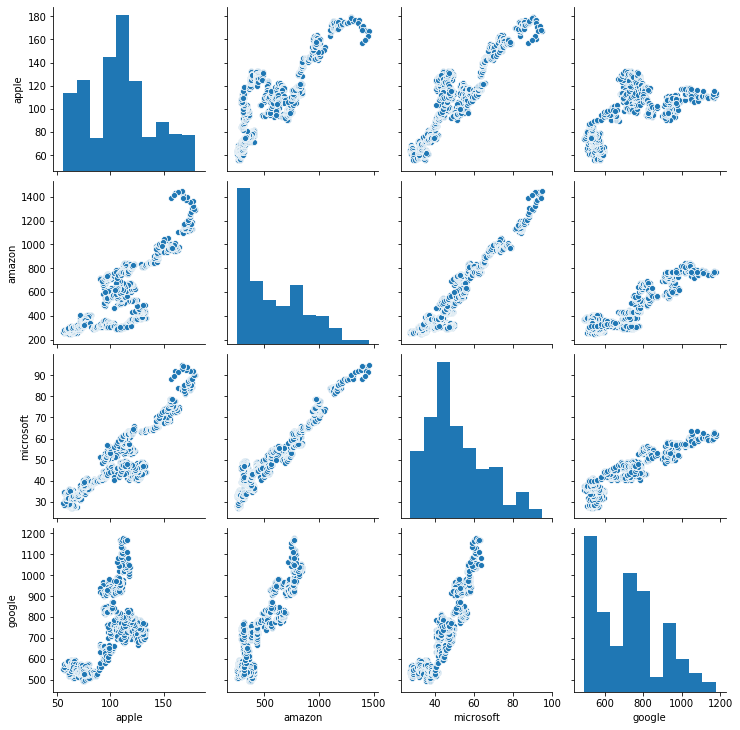

In [11]:
sns.pairplot(close_df)

In [12]:
#From the plots above, we see that amazon and microsft have a linear correlation.

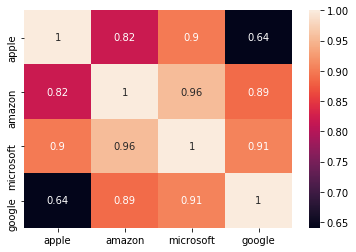

In [13]:
#We can also visualize this on a heat map for better interpretation
sns.heatmap(close_df.corr(),annot=True)

In [14]:
#From the above plot, you can see that if microsoft increases,then amazon has a 96% chance of increasing.

## Lets Analyze daily returns of each stock and how they are co-related

In [16]:
#We have the four tech companies dataframe,lets now create a new dataframe that contains their returns
data_df=pd.DataFrame()

In [17]:
data_df['%_change_apple']=((apple_df['close']-apple_df['open'])/apple_df['close'])*100
data_df['%_change_amazon']=((amazon_df['close']-amazon_df['open'])/amazon_df['close'])*100
data_df['%_change_microsoft']=((microsoft_df['close']-microsoft_df['open'])/microsoft_df['close'])*100
data_df['%_change_google']=((google_df['close']-google_df['open'])/google_df['close'])*100
data_df.head()

,%_change_apple,%_change_amazon,%_change_microsoft,%_change_google
0,0.206325,0.209964,0.725953,-1.708269
1,0.714688,-2.328836,0.753769,-0.216075
2,-2.481344,-0.189409,0.000000,-1.781065
3,-0.042869,2.946525,0.356761,1.489879
4,0.443624,0.694548,0.427960,0.334039


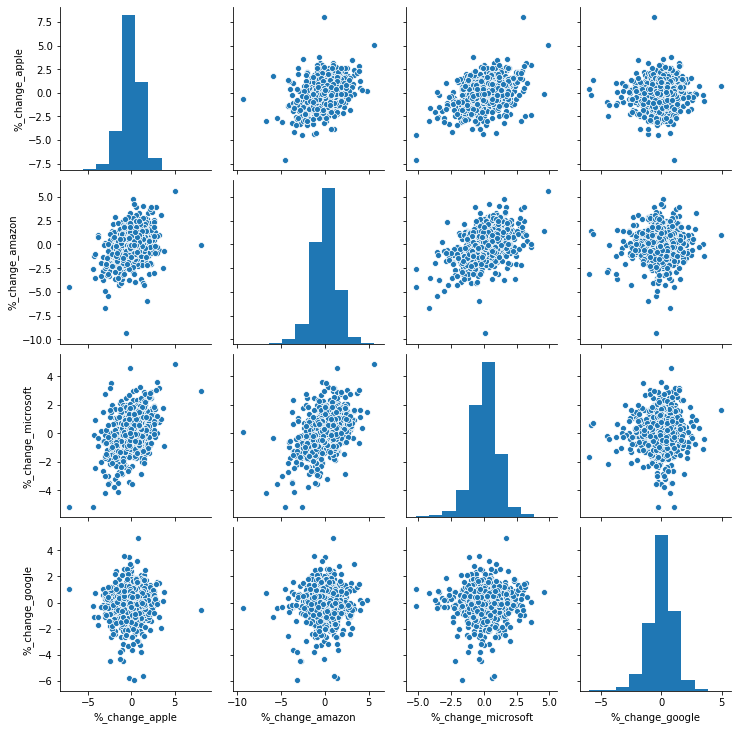

In [18]:
#Next we visualize
sns.pairplot(data_df)

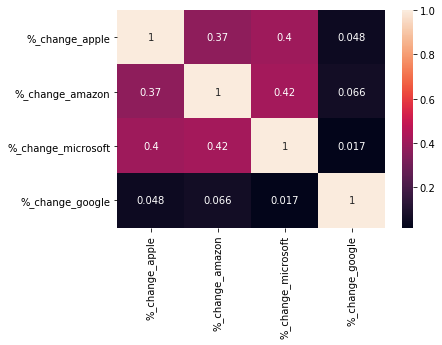

In [19]:
#Lets visualize it on a heatmap
sns.heatmap(data_df.corr(),annot=True)

In [20]:
#From here we can see that microsoft and amazon has the highest correlation of about 48%

## Lets now perform value at risk analysis for the various tech companies

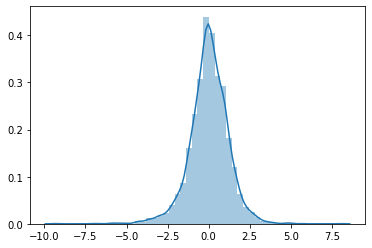

In [21]:
#We can do this analysis by visualization and calculation
sns.distplot(data_df)

In [22]:
data_df['%_change_apple'].std()

## This gives 68% of entire data

1.1871377131421237

In [26]:
#for two standard deviation, we have
data_df['%_change_apple'].std()*2

#this gives 95% of entire data

2.3742754262842474

In [27]:
#for three standard deviation
data_df['%_change_apple'].std()*3

#this gives 99.7% of entire data
#It means there is 99.7% chance that our daily return will lie between -3.561413... and +3.561413... 

3.561413139426371

In [23]:
data_df['%_change_apple'].quantile(0.1)

#This means, 90% of the time, my worse daily loss will not exceed -1.4246644....

-1.4246644227944307

In [24]:
#Better still, we can get all the statistical function by describe
data_df.describe()

,%_change_apple,%_change_amazon,%_change_microsoft,%_change_google
count,1259.000000,1259.000000,1259.000000,975.000000
mean,-0.000215,-0.000398,0.076404,-0.012495
std,1.187138,1.358679,1.059260,1.092560
min,-7.104299,-9.363077,-5.177618,-5.952266
25%,-0.658021,-0.738341,-0.509241,-0.551963
50%,0.042230,-0.002623,0.061069,0.024951
75%,0.715427,0.852568,0.703264,0.672649
max,8.000388,5.640265,4.861491,4.943550


In [25]:
data_df.describe().T

#From the result below, the max daily return is 8.000388

,count,mean,std,min,25%,50%,75%,max
%_change_apple,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
%_change_amazon,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
%_change_microsoft,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
%_change_google,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550


In [ ]:
#From here, we can do our analysis